In [40]:
import mysql.connector
import pandas as pd

ojk = mysql.connector.connect(
    host = "database-1.cnu82kme6p4d.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "eda",
    password = "ojk0707",
    database = "ojk"
)
cursor = ojk.cursor()
query = "SELECT * FROM restaurant where score > 3.0"
restaurant = pd.read_sql(query, ojk)
restaurant.head()

/tmp/ipykernel_13930/2761295241.py:13: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,station,category,score,review,price,address,latitude,longitude
0,100-17이태리선술집,신길역,"호프,요리주점",4.9,171,13750,서울 영등포구 도신로 254 (우)07352,37.513005,126.919179
1,103호,당산역,실내포장마차,4.3,222,11000,서울 영등포구 양평로 64-1 1층 (우)07222,37.535288,126.899660
2,10G,여의나루역,디저트카페,3.9,120,6000,서울 영등포구 국제금융로 10 1층 (우)07326,37.524978,126.925298
3,10꼬르소꼬모서울카페,압구정로데오역,카페,3.2,70,16250,서울 강남구 압구정로 416 더트리니티빌딩 지하1층 (우)06015,37.526916,127.042419
4,153구포국수 군자점,군자(능동)역,분식,4.6,93,7375,서울 광진구 동일로60길 37 (우)04994,37.557979,127.075491


In [41]:
import numpy as np

restaurant['value'] = restaurant['score'] * np.log(restaurant['review']+1)
restaurant.head()

,name,station,category,score,review,price,address,latitude,longitude,value
0,100-17이태리선술집,신길역,"호프,요리주점",4.9,171,13750,서울 영등포구 도신로 254 (우)07352,37.513005,126.919179,25.222723
1,103호,당산역,실내포장마차,4.3,222,11000,서울 영등포구 양평로 64-1 1층 (우)07222,37.535288,126.899660,23.250839
2,10G,여의나루역,디저트카페,3.9,120,6000,서울 영등포구 국제금융로 10 1층 (우)07326,37.524978,126.925298,18.703583
3,10꼬르소꼬모서울카페,압구정로데오역,카페,3.2,70,16250,서울 강남구 압구정로 416 더트리니티빌딩 지하1층 (우)06015,37.526916,127.042419,13.640576
4,153구포국수 군자점,군자(능동)역,분식,4.6,93,7375,서울 광진구 동일로60길 37 (우)04994,37.557979,127.075491,20.899156


In [42]:
import plotly.express as px

fig = px.histogram(restaurant,x='value',title='평가지수별 맛집 분포',color_discrete_sequence=['green'])
fig.update_layout(
    xaxis_title='평가지수 (평점 × log(리뷰수 + 1))',
    yaxis_title='맛집 수'
)
fig.show()

In [43]:
avg_value_value = restaurant['value'].mean()
print("전체 맛집의 평균 평가지수:", avg_value_value)

전체 맛집의 평균 평가지수: 19.016617384289333


In [44]:
import plotly.express as px

# 평균 평가지수 계산
avg_value_value = restaurant['value'].mean()
print("전체 맛집의 평균 평가지수:", avg_value_value)

# 히스토그램 생성
fig = px.histogram(
    restaurant,
    x='value',
    title='평가지수별 맛집 분포',
    color_discrete_sequence=['green']
)

# 레이아웃 설정
fig.update_layout(
    xaxis_title='평가지수 (평점 × log(리뷰수 + 1))',
    yaxis_title='맛집 수'
)

# y축 최대값 추정 (히스토그램의 최대 빈도 수치)
y_max = restaurant['value'].value_counts(bins=50).max()  # bin 수는 실제 그래프와 맞춰줘야 함

# 평균선 추가 (적당한 y1 사용)
fig.add_shape(
    type='line',
    x0=avg_value_value,
    x1=avg_value_value,
    y0=0,
    y1=y_max,
    line=dict(color='black', dash='dash')
)

# 평균선 텍스트 라벨
fig.add_annotation(
    x=avg_value_value,
    y=y_max,
    text=f"평균 평가지수: {avg_value_value:.2f}",
    showarrow=False,
    yshift=10,
    font=dict(color='black')
)

fig.show()



전체 맛집의 평균 평가지수: 19.016617384289333


In [86]:
count = restaurant[(restaurant['value'] >= 20) & (restaurant['value'] < 21)].shape[0]
print("평가지수 25 이상 26 미만인 맛집 수:", count)

평가지수 25 이상 26 미만인 맛집 수: 323


In [87]:
# 조건에 해당하는 데이터 추출
subset= restaurant[(restaurant['value'] >= 20) & (restaurant['value'] < 21)]

# 평점과 리뷰수 컬럼만 보기
subset[['name', 'score', 'review']]

,name,score,review
4,153구포국수 군자점,4.6,93
13,28총각,4.4,97
60,가람떡갈비,3.3,515
64,가마솥손두부,4.0,182
105,강강술래 역삼점,3.7,233
...,...,...,...
4334,홍어한마리,4.8,71
4359,화양연가,4.5,101
4362,화이트캐롯,4.6,85
4385,회기버거 본점,4.3,119


In [88]:
# score가 가장 낮은 맛집 한 곳 보기
lowest_score_row = subset.sort_values(by='score').head(5)

# name, score, review_count 확인
print(lowest_score_row[['name', 'score','review','value']])

                      name  score  review      value
3579              최영희언양불고기    3.1     788  20.679376
718   더 리버사이드 호텔 뷔페 더 가든키친    3.1     708  20.347952
3538                   청류벽    3.2     629  20.626303
4315             호호식당 대학로점    3.2     615  20.554390
672                   대두족발    3.2     530  20.079238


In [ ]:
# 상위 10% 기준 value 값 계산
threshold = restaurant['value'].quantile(0.90)
print(f"상위 10% 평가지수 기준: {threshold:.2f}")

# 그 이상인 맛집만 추출
top_restaurants = restaurant[restaurant['value'] >= threshold]

In [45]:
# 역별 평균 value 계산
station_value_avg = restaurant.groupby('station', as_index=False)['value'].mean()
station_value_avg = station_value_avg.sort_values(by='value', ascending=False)
# 막대그래프 시각화
fig = px.bar(
    station_value_avg,
    x='station',
    y='value',
    title='지하철역별 맛집 평가지수 평균',
    labels={'station': '지하철역', 'value': '평균 평가지수'},
    color_discrete_sequence=['green']
)

fig.show()

In [46]:
# 상위 10개만 추출
value_top10 = station_value_avg.head(10)

# 그래프 그리기
fig = px.bar(
    value_top10,
    x='station',
    y='value',
    title='평균 평가지수 기준 상위 10개 지하철역',
    color_discrete_sequence=['red']

)
fig.update_layout(
    width=800,
    height=500,
    bargap=0.3,  # 바 간격 (막대 폭 줄이기 효과)
    title='맛집 평균 평가지수 기준 상위 10개 지하철역',
    xaxis_title='지하철역',
    yaxis_title='평균 평가지수'
)
fig.show()

In [47]:
# value 오름차순 정렬 (작은 값이 먼저 오게)
station_avg_value_sorted = station_value_avg.sort_values(by='value', ascending=True)

# 하위 10개만 추출
value_bottom10 = station_avg_value_sorted.head(10)

# 그래프 그리기
fig = px.bar(
    value_bottom10,
    x='station',
    y='value',
    title='맛집 평균 평가지수 기준 하위 10개 지하철역',
    color_discrete_sequence=['blue']
)

fig.update_layout(
    width=800,
    height=500,
    bargap=0.3,
    xaxis_title='지하철역',
    yaxis_title='평균 평가지수'
)

fig.show()

In [48]:
restaurant['performance'] = np.where(restaurant['price'] == 0, 0, restaurant['score'] / restaurant['price'])
restaurant.head()

,name,station,category,score,review,price,address,latitude,longitude,value,performance
0,100-17이태리선술집,신길역,"호프,요리주점",4.9,171,13750,서울 영등포구 도신로 254 (우)07352,37.513005,126.919179,25.222723,0.000356
1,103호,당산역,실내포장마차,4.3,222,11000,서울 영등포구 양평로 64-1 1층 (우)07222,37.535288,126.899660,23.250839,0.000391
2,10G,여의나루역,디저트카페,3.9,120,6000,서울 영등포구 국제금융로 10 1층 (우)07326,37.524978,126.925298,18.703583,0.000650
3,10꼬르소꼬모서울카페,압구정로데오역,카페,3.2,70,16250,서울 강남구 압구정로 416 더트리니티빌딩 지하1층 (우)06015,37.526916,127.042419,13.640576,0.000197
4,153구포국수 군자점,군자(능동)역,분식,4.6,93,7375,서울 광진구 동일로60길 37 (우)04994,37.557979,127.075491,20.899156,0.000624


In [49]:
import plotly.express as px

fig = px.histogram(restaurant,x='performance',title='가성비지수별 맛집 분포',color_discrete_sequence=['green'])
fig.update_layout(
    xaxis_title='가성비지수 (평점/평균 가격)',
    yaxis_title='맛집 수'
)
fig.show()

In [50]:
avg_performance_value = restaurant['performance'].mean()
print("전체 맛집의 평균 평가지수:", avg_performance_value)

전체 맛집의 평균 평가지수: 0.00032463639767451723


In [51]:
import plotly.express as px

# 평균 가성비지수 계산
avg_performance_value = restaurant['performance'].mean()
print("전체 맛집의 평균 가성비지수:", avg_performance_value)

# 히스토그램 생성
fig = px.histogram(
    restaurant,
    x='performance',
    title='가성비지수별 맛집 분포',
    color_discrete_sequence=['green']
)

# 레이아웃 설정
fig.update_layout(
    xaxis_title='가성비지수 (평점 / 평균 가격)',
    yaxis_title='맛집 수'
)

# y축 최대값 추정 (적절한 길이의 선)
y_max = restaurant['performance'].value_counts(bins=50).max()

# 평균선 추가
fig.add_shape(
    type='line',
    x0=avg_performance_value,
    x1=avg_performance_value,
    y0=0,
    y1=y_max,
    line=dict(color='black', dash='dash')
)

# 평균선 텍스트 라벨
fig.add_annotation(
    x=avg_performance_value,
    y=y_max,
    text=f"평균 가성비지수: {avg_performance_value:.5f}",
    showarrow=False,
    yshift=10,
    font=dict(color='black')
)

fig.show()


전체 맛집의 평균 가성비지수: 0.00032463639767451723


In [52]:
# 역별 평균 value 계산
station_performance_avg = restaurant.groupby('station', as_index=False)['performance'].mean()
station_performance_avg = station_performance_avg.sort_values(by='performance', ascending=False)
# 막대그래프 시각화
fig = px.bar(
    station_performance_avg,
    x='station',
    y='performance',
    title='지하철역별 맛집 가성비지수 평균',
    labels={'station': '지하철역', 'performance': '평균 가성비지수'},
    color_discrete_sequence=['green']
)

fig.show()

In [53]:
# 상위 10개만 추출
performance_top10 = station_performance_avg.head(10)

# 그래프 그리기
fig = px.bar(
    performance_top10,
    x='station',
    y='performance',
    title='평균 가성비지수 기준 상위 10개 지하철역',
    color_discrete_sequence=['red']

)
fig.update_layout(
    width=800,
    height=500,
    bargap=0.3,  # 바 간격 (막대 폭 줄이기 효과)
    title='맛집 평균 가성비지수 기준 상위 10개 지하철역',
    xaxis_title='지하철역',
    yaxis_title='평균 가성비지수'
)
fig.show()

In [54]:
# value 오름차순 정렬 (작은 값이 먼저 오게)
station_avg_performance_sorted = station_performance_avg.sort_values(by='performance', ascending=True)

# 하위 10개만 추출
performance_bottom10 = station_avg_performance_sorted.head(10)

# 그래프 그리기
fig = px.bar(
    performance_bottom10,
    x='station',
    y='performance',
    title='맛집 평균 가성비지수 기준 하위 10개 지하철역',
    color_discrete_sequence=['blue']
)

fig.update_layout(
    width=800,
    height=500,
    bargap=0.3,
    xaxis_title='지하철역',
    yaxis_title='평균 가성비지수'
)

fig.show()

In [55]:
import plotly.express as px

fig = px.histogram(restaurant,x='price',title='가격별 맛집 분포',color_discrete_sequence=['green'])
fig.update_layout(
    xaxis_title='가격',
    yaxis_title='맛집 수'
)
fig.show()

In [56]:
avg_price_value = restaurant['price'].mean()
print("전체 맛집의 평균 평가지수:", avg_price_value)


전체 맛집의 평균 평가지수: 20284.293002257335


In [57]:
import plotly.express as px

# 평균 가격 계산
avg_price_value = restaurant['price'].mean()
print("전체 맛집의 평균 가격:", avg_price_value)

# 히스토그램 생성
fig = px.histogram(restaurant, x='price', title='가격별 맛집 분포',color_discrete_sequence=['green'])

# 축 라벨 수정
fig.update_layout(
    xaxis_title='가격',
    yaxis_title='맛집 수'
)

# 평균 가격선 추가
fig.add_shape(
    type='line',
    x0=avg_price_value,
    x1=avg_price_value,
    y0=0,
    y1=restaurant['price'].value_counts().max(),  # y축 최대값으로 선을 끝까지
    line=dict(color='black', dash='dash')
)

# 선에 라벨 추가
fig.add_annotation(
    x=avg_price_value,
    y=restaurant['price'].value_counts().max(),
    text=f"평균 가격: {avg_price_value:.2f}",
    showarrow=False,
    yshift=10,
    font=dict(color='black')
)

fig.show()

전체 맛집의 평균 가격: 20284.293002257335


In [58]:

restaurant.head()

,name,station,category,score,review,price,address,latitude,longitude,value,performance
0,100-17이태리선술집,신길역,"호프,요리주점",4.9,171,13750,서울 영등포구 도신로 254 (우)07352,37.513005,126.919179,25.222723,0.000356
1,103호,당산역,실내포장마차,4.3,222,11000,서울 영등포구 양평로 64-1 1층 (우)07222,37.535288,126.899660,23.250839,0.000391
2,10G,여의나루역,디저트카페,3.9,120,6000,서울 영등포구 국제금융로 10 1층 (우)07326,37.524978,126.925298,18.703583,0.000650
3,10꼬르소꼬모서울카페,압구정로데오역,카페,3.2,70,16250,서울 강남구 압구정로 416 더트리니티빌딩 지하1층 (우)06015,37.526916,127.042419,13.640576,0.000197
4,153구포국수 군자점,군자(능동)역,분식,4.6,93,7375,서울 광진구 동일로60길 37 (우)04994,37.557979,127.075491,20.899156,0.000624


/tmp/ipykernel_13930/1517381294.py:17: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



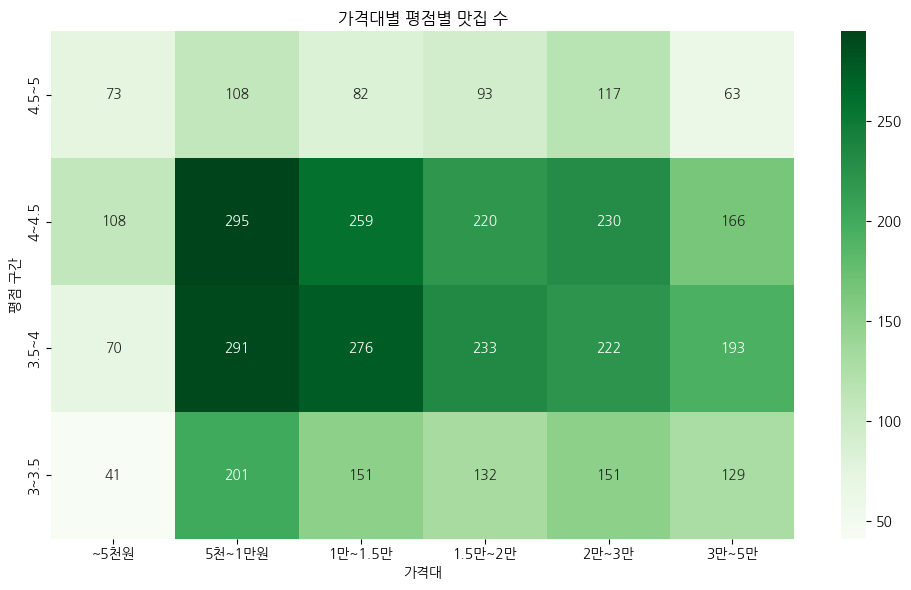

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 가격대 구간
price_bins = [0, 5000, 10000, 15000, 20000, 30000, 50000]
price_labels = ['~5천원', '5천~1만원', '1만~1.5만', '1.5만~2만', '2만~3만', '3만~5만']
restaurant['price_range'] = pd.cut(restaurant['price'], bins=price_bins, labels=price_labels)

# 평점 구간
score_bins = [3, 3.5, 4, 4.5, 5.0]
score_labels = [ '3~3.5', '3.5~4', '4~4.5', '4.5~5']
restaurant['score_range'] = pd.cut(restaurant['score'], bins=score_bins, labels=score_labels)

# 피벗 테이블
pivot = restaurant.pivot_table(index='score_range', columns='price_range', aggfunc='size', fill_value=0)

# ✅ 평점 구간 역순으로 정렬해서 y축 위로 갈수록 평점 높게
pivot = pivot.reindex(index=score_labels[::-1])

# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens')
plt.title('가격대별 평점별 맛집 수')
plt.xlabel('가격대')
plt.ylabel('평점 구간')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13930/3299226385.py:18: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



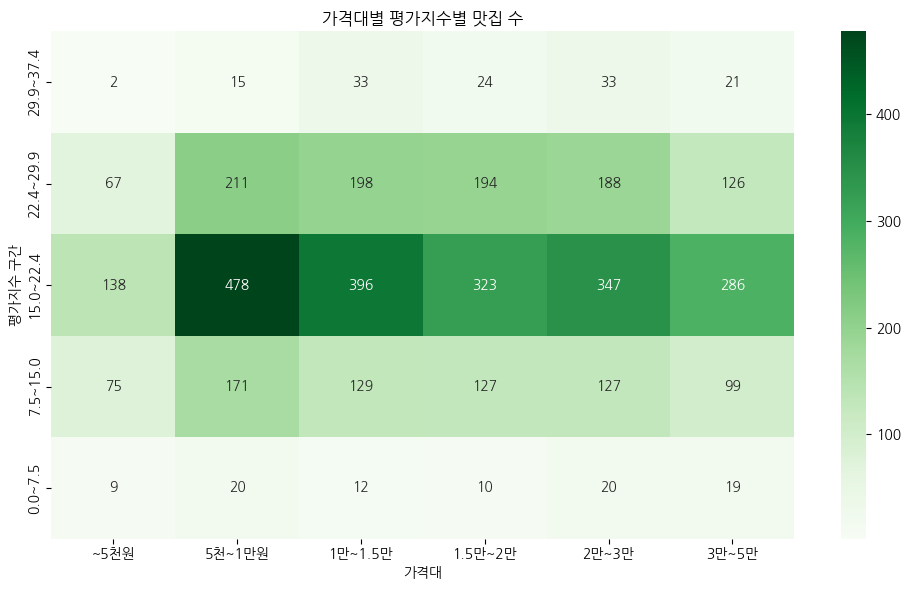

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

# ✅ 가격대 구간
price_bins = [0, 5000, 10000, 15000, 20000, 30000, 50000]
price_labels = ['~5천원', '5천~1만원', '1만~1.5만', '1.5만~2만', '2만~3만', '3만~5만']
restaurant['price_range'] = pd.cut(restaurant['price'], bins=price_bins, labels=price_labels)

# ✅ 평가지수(value) 구간 설정
value_bins = np.linspace(restaurant['value'].min(), restaurant['value'].max(), 6)  # 5개 구간
value_labels = [f"{round(value_bins[i], 1)}~{round(value_bins[i+1], 1)}" for i in range(len(value_bins)-1)]
restaurant['value_range'] = pd.cut(restaurant['value'], bins=value_bins, labels=value_labels)

# ✅ 피벗 테이블 생성
pivot = restaurant.pivot_table(index='value_range', columns='price_range', aggfunc='size', fill_value=0)

# ✅ value 구간 역순 정렬 (높을수록 위로)
pivot = pivot.reindex(index=value_labels[::-1])

# ✅ 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens')
plt.title('가격대별 평가지수별 맛집 수')
plt.xlabel('가격대')
plt.ylabel('평가지수 구간')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13930/4082285860.py:32: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



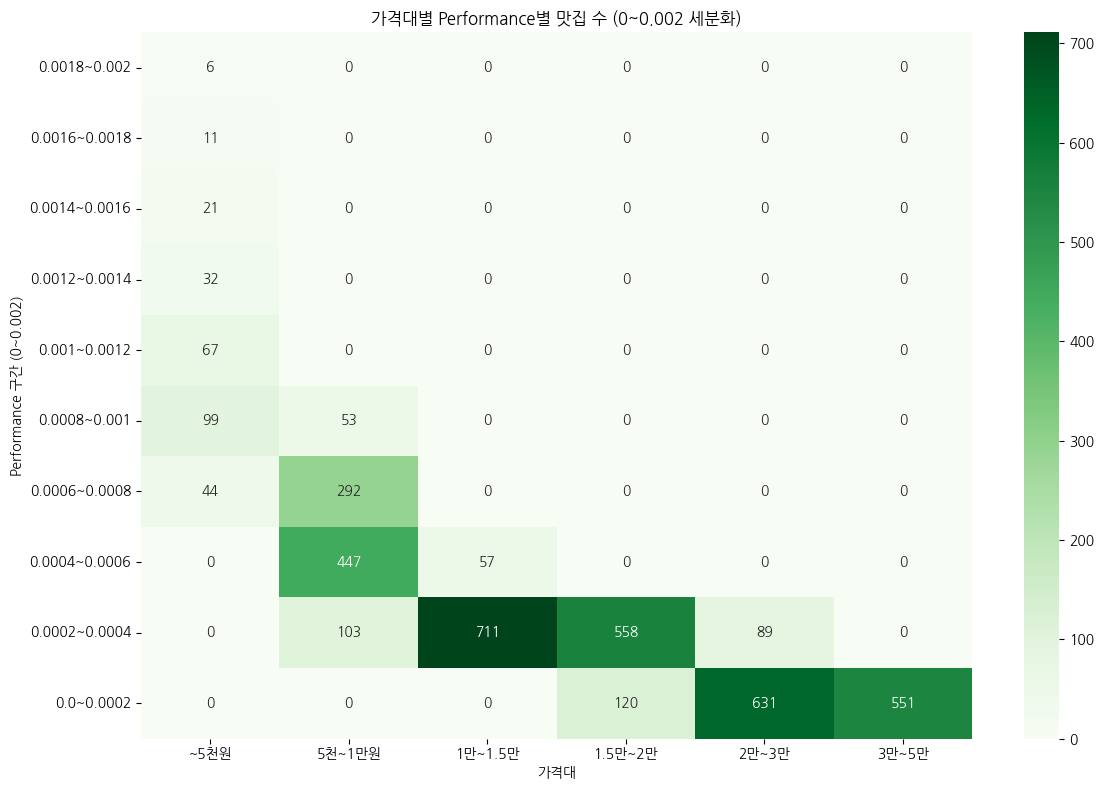

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import numpy as np

# ✅ 가격대 구간 설정
price_bins = [0, 5000, 10000, 15000, 20000, 30000, 50000]
price_labels = ['~5천원', '5천~1만원', '1만~1.5만', '1.5만~2만', '2만~3만', '3만~5만']
restaurant['price_range'] = pd.cut(restaurant['price'], bins=price_bins, labels=price_labels)

# ✅ performance 구간 설정 (0 ~ 0.002, 10등분)
performance_max = 0.002
performance_bins = np.linspace(0, performance_max, 11)  # 10구간 → 11개의 경계
performance_labels = [
    f"{round(performance_bins[i], 4)}~{round(performance_bins[i+1], 4)}"
    for i in range(len(performance_bins) - 1)
]

# ✅ restaurant['performance']가 0.002 초과인 데이터는 제외
filtered_restaurant = restaurant[restaurant['performance'] <= performance_max].copy()

# ✅ performance_range 생성
filtered_restaurant['performance_range'] = pd.cut(
    filtered_restaurant['performance'],
    bins=performance_bins,
    labels=performance_labels,
    include_lowest=True
)

# ✅ 피벗 테이블 생성
pivot = filtered_restaurant.pivot_table(
    index='performance_range',
    columns='price_range',
    aggfunc='size',
    fill_value=0
)

# ✅ 높은 성능이 위로 가도록 정렬
pivot = pivot.reindex(index=performance_labels[::-1])

# ✅ 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens')
plt.title('가격대별 Performance별 맛집 수 (0~0.002 세분화)')
plt.xlabel('가격대')
plt.ylabel('Performance 구간 (0~0.002)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13930/2108747299.py:17: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



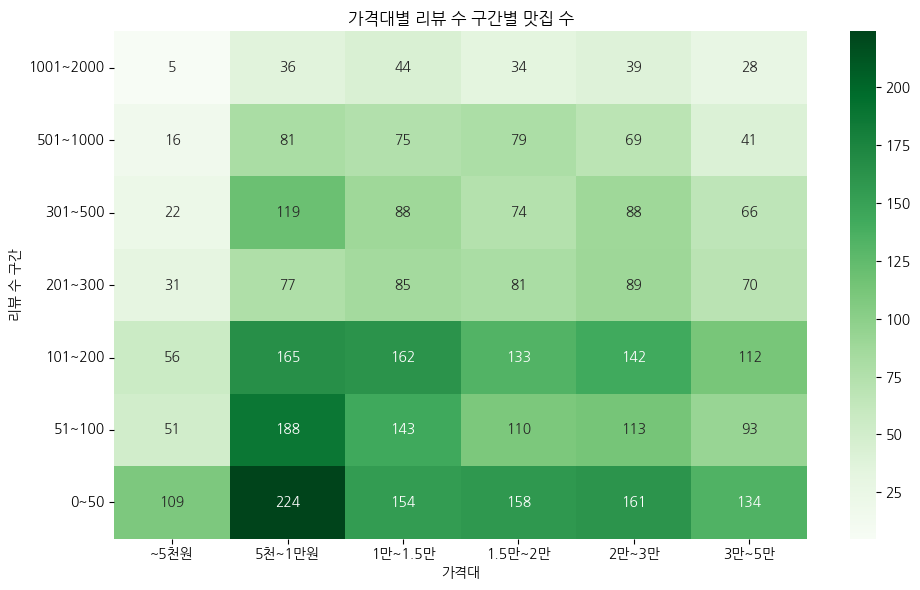

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 가격대 구간 정의
price_bins = [0, 5000, 10000, 15000, 20000, 30000, 50000]
price_labels = ['~5천원', '5천~1만원', '1만~1.5만', '1.5만~2만', '2만~3만', '3만~5만']
restaurant['price_range'] = pd.cut(restaurant['price'], bins=price_bins, labels=price_labels)

# 2. 리뷰 수 구간 정의
review_bins = [0, 50, 100, 200, 300, 500, 1000, 2000]
review_labels = ['0~50', '51~100', '101~200', '201~300', '301~500', '501~1000', '1001~2000']
restaurant['review_range'] = pd.cut(restaurant['review'], bins=review_bins, labels=review_labels)

# 3. 피벗 테이블 생성
pivot = restaurant.pivot_table(index='review_range', columns='price_range', aggfunc='size', fill_value=0)

# 4. 리뷰 수 구간을 위로 갈수록 많게 정렬
pivot = pivot.reindex(index=review_labels[::-1])

# 5. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens')
plt.title('가격대별 리뷰 수 구간별 맛집 수')
plt.xlabel('가격대')
plt.ylabel('리뷰 수 구간')
plt.tight_layout()
plt.show()

/tmp/ipykernel_13930/3185126823.py:17: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



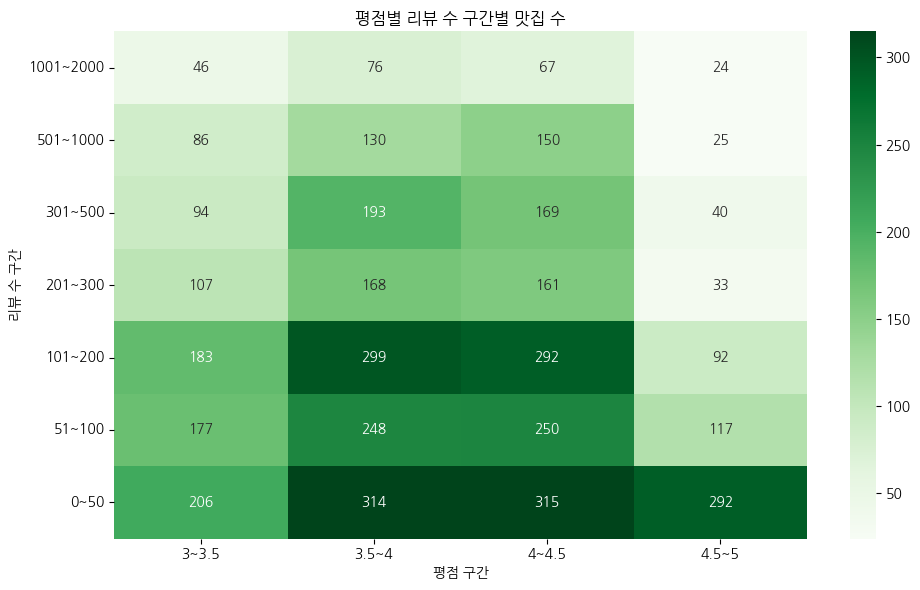

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 평점 구간 정의
score_bins = [ 3, 3.5, 4, 4.5, 5.0]
score_labels = [ '3~3.5', '3.5~4', '4~4.5', '4.5~5']
restaurant['score_range'] = pd.cut(restaurant['score'], bins=score_bins, labels=score_labels)

# 2. 리뷰 수 구간 정의
review_bins = [0, 50, 100, 200, 300, 500, 1000, 2000]
review_labels = ['0~50', '51~100', '101~200', '201~300', '301~500', '501~1000', '1001~2000']
restaurant['review_range'] = pd.cut(restaurant['review'], bins=review_bins, labels=review_labels)

# 3. 피벗 테이블 생성
pivot = restaurant.pivot_table(index='review_range', columns='score_range', aggfunc='size', fill_value=0)

# 4. 리뷰 수 구간을 위로 갈수록 많게 정렬
pivot = pivot.reindex(index=review_labels[::-1])
pivot = pivot.reindex(columns=score_labels)  # score도 순서 맞추기

# 5. 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Greens')
plt.title('평점별 리뷰 수 구간별 맛집 수')
plt.xlabel('평점 구간')
plt.ylabel('리뷰 수 구간')
plt.tight_layout()
plt.show()